In this notebook we are looking at the crash data from SWITRS for Los Angeles City, to help us determine how to narrow down the hot spots we want to analyze. 

Author: Danielle Parnes

## Import Libraries

In [30]:
# libraries
import urllib.request, json #this allows us to community via http via url command, allow to access data through API
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# for interactive plots
import plotly.express as px

# to make interactive maps
from sodapy import Socrata

## ALL FATALITIES 2014 - 2019
## Import Data + Get into clean geodataframe

In [31]:
#import data
dfcrashes = pd.read_csv('data/Collisions_2014-2019__SWITRS_fatalities.csv')

In [32]:
#check out the data
dfcrashes

,X,Y,OBJECTID,case_id,accident_year,proc_date,juris,collision_date,collision_time,officer_id,...,month_,city,county,state,point_x,point_y,match_addr,m_primaryrd,m_secondrd,int_id
0,-118.651679,34.176823,61449,8808186,2019,2019/05/24 00:00:00+00,1942,2019/05/15 00:00:00+00,1145,38399.0,...,5,LOS ANGELES,LOS ANGELES,CA,-118.651679,34.176823,"VALLEY CIRCLE BLVD & EL CANON AVE, LOS ANGELES...",VALLEY CIRCLE BLVD,EL CANON AVE,118693
1,-118.648302,34.174107,133146,7190575,2016,2016/11/22 00:00:00+00,1942,2016/10/25 00:00:00+00,1540,40735.0,...,10,LOS ANGELES,LOS ANGELES,CA,-118.648302,34.174107,"VALLEY CIRCLE BLVD & HATTERAS ST, LOS ANGELES, CA",VALLEY CIRCLE BLVD,HATTERAS ST,146831
2,-118.646639,34.221478,173832,7199893,2017,2017/01/26 00:00:00+00,1942,2017/01/03 00:00:00+00,230,40972.0,...,1,LOS ANGELES,LOS ANGELES,CA,-118.646639,34.221478,"DEER LICK DR & VALLEY CIRCLE BLVD, LOS ANGELES...",DEER LICK DR,VALLEY CIRCLE BLVD,102206
3,-118.646472,34.211826,160183,6808910,2014,2016/03/25 00:00:00+00,1942,2014/12/07 00:00:00+00,1220,38017.0,...,12,LOS ANGELES,LOS ANGELES,CA,-118.646472,34.211826,"VALLEY CIRCLE BLVD & INGOMAR ST, LOS ANGELES, CA",VALLEY CIRCLE BLVD,INGOMAR ST,108523
4,-118.644072,34.196095,113367,7006275,2015,2015/11/13 00:00:00+00,1942,2015/09/24 00:00:00+00,725,30452.0,...,9,LOS ANGELES,LOS ANGELES,CA,-118.644072,34.196095,"HIGHLANDER RD & DARNOCH WAY, LOS ANGELES, CA",HIGHLANDER RD,DARNOCH WAY,111946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,-118.176676,34.069748,30250,7190155,2016,2016/05/05 00:00:00+00,1942,2016/03/23 00:00:00+00,600,38050.0,...,3,LOS ANGELES,LOS ANGELES,CA,-118.176676,34.069748,"ALHAMBRA AVE & GRATIOT ST, LOS ANGELES, CA",ALHAMBRA AVE,GRATIOT ST,100483
1248,-118.174907,34.087730,30385,6904927,2015,2015/05/15 00:00:00+00,1942,2015/03/10 00:00:00+00,820,38233.0,...,3,LOS ANGELES,LOS ANGELES,CA,-118.174907,34.087730,"HUNTINGTON DR & PUEBLO AVE, LOS ANGELES, CA",HUNTINGTON DR,PUEBLO AVE,119824
1249,-118.173152,34.117683,57323,8466003,2019,2019/08/13 00:00:00+00,1942,2019/05/05 00:00:00+00,110,30083.0,...,5,LOS ANGELES,LOS ANGELES,CA,-118.173152,34.117683,"SAN PASCUAL AVE & POLLARD ST, LOS ANGELES, CA",SAN PASCUAL AVE,POLLARD ST,142575
1250,-118.171036,34.074707,180238,7199962,2017,2017/07/26 00:00:00+00,1942,2017/02/22 00:00:00+00,1840,38233.0,...,2,LOS ANGELES,LOS ANGELES,CA,-118.171036,34.074707,"ALHAMBRA AVE & ENDICOTT ST, LOS ANGELES, CA",ALHAMBRA AVE,ENDICOTT ST,150098


In [33]:
#view basic ino about the data
dfcrashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 90 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   X                        1252 non-null   float64
 1   Y                        1252 non-null   float64
 2   OBJECTID                 1252 non-null   int64  
 3   case_id                  1252 non-null   int64  
 4   accident_year            1252 non-null   int64  
 5   proc_date                1252 non-null   object 
 6   juris                    1252 non-null   int64  
 7   collision_date           1252 non-null   object 
 8   collision_time           1252 non-null   int64  
 9   officer_id               1249 non-null   float64
 10  reporting_district       1247 non-null   object 
 11  day_of_week              1252 non-null   int64  
 12  chp_shift                1252 non-null   int64  
 13  population               1252 non-null   int64  
 14  cnty_city_loc           

In [34]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdfcrashes = gpd.GeoDataFrame(dfcrashes, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(dfcrashes.X, dfcrashes.Y)) 

## Map it statically

In [35]:
#see what kind of projection the data is currently
gdfcrashes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
# reproject to web mercator
gdfcrashes_web_mercator = gdfcrashes.to_crs(epsg=3857)

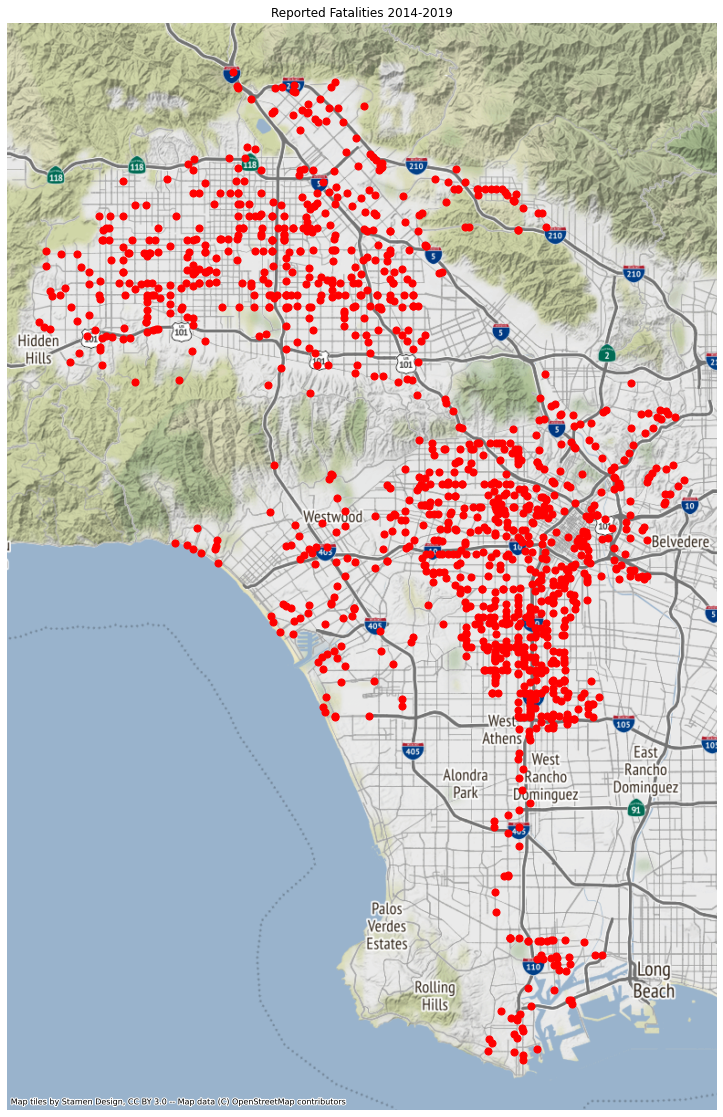

In [37]:
# map it
fig, ax = plt.subplots(figsize=(20,20))

gdfcrashes_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize=50,
                      color='red')

ax.axis('off')

ax.set_title('Reported Fatalities 2014-2019')

ctx.add_basemap(ax)

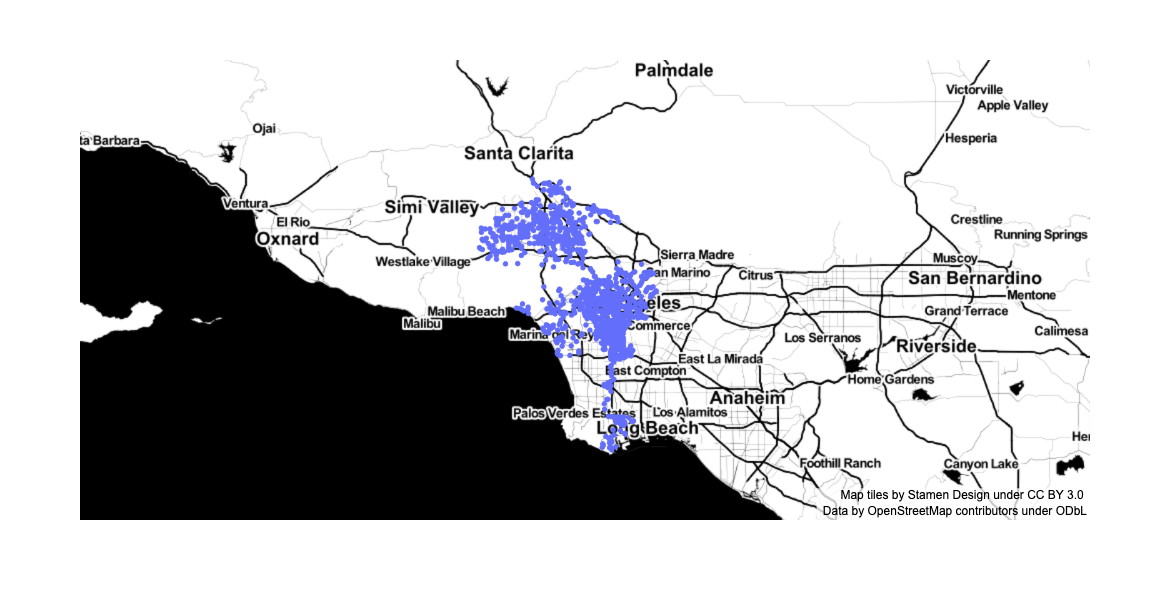

In [52]:
fig = px.scatter_mapbox(gdfcrashes_web_mercator,
                        lat='Y',
                        lon='X',
                        mapbox_style="stamen-toner",
                       labels={'count_ped_killed'},
                        height=600,   
                       hover_data=["accident_year","number_killed","number_injured","collision_severity","collision_time"
                                ])
fig.show()

In [53]:
fig.write_html("all_fatalities.html")

In [39]:
from keplergl import KeplerGl

In [40]:
map1 = KeplerGl(height=600,width=800)
map1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

In [41]:
map1.add_data(data=gdfcrashes)

In [42]:
dfcrashes[dfcrashes.X == 0]

,X,Y,OBJECTID,case_id,accident_year,proc_date,juris,collision_date,collision_time,officer_id,...,city,county,state,point_x,point_y,match_addr,m_primaryrd,m_secondrd,int_id,geometry


In [43]:
map1.save_to_html(file_name='fatalities1.html',read_only=True)

Map saved to fatalities1.html!


## 80 FATALITY HOT SPOTS

## Import Data + Get into clean geodataframe

In [44]:
#import data
dflocations = pd.read_csv('data/locations.csv')

In [45]:
#check out the data
dflocations

,point_x,point_y,match_addr
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA"
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA"
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA"
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA"
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA"
...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA"
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA"
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA"
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA"


In [46]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdflocations = gpd.GeoDataFrame(dflocations, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(dflocations.point_x, dflocations.point_y)) 

In [47]:
#see what kind of projection the data is currently
gdflocations.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
# reproject to web mercator
gdflocations_web_mercator = gdflocations.to_crs(epsg=3857)

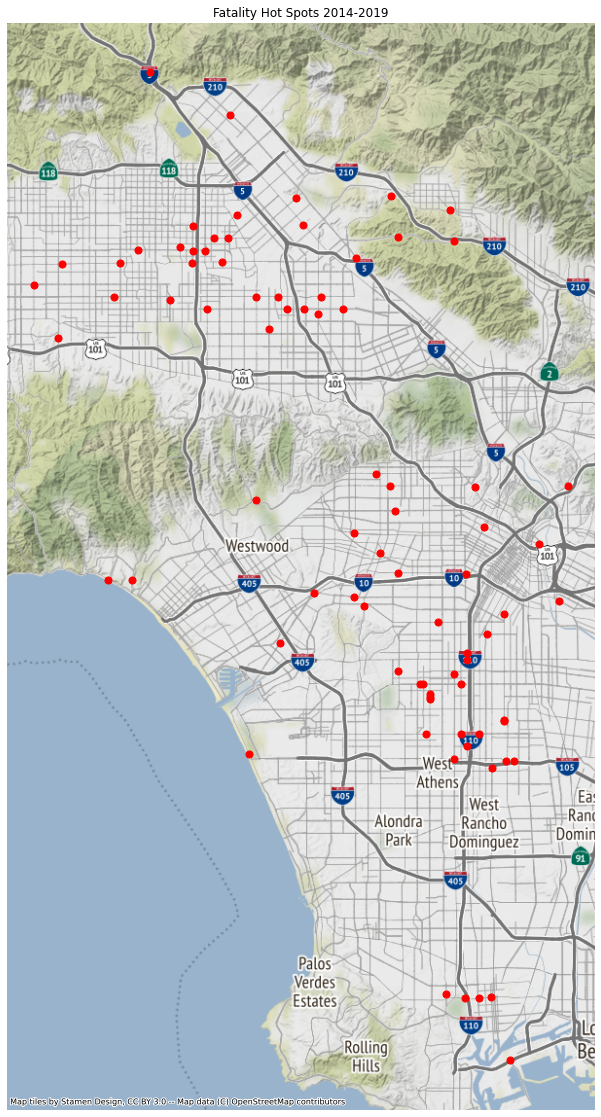

In [49]:
# map it
fig, ax = plt.subplots(figsize=(20,20))

gdflocations_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize=50,
                      color='red')

ax.axis('off')

ax.set_title('Fatality Hot Spots 2014-2019')

ctx.add_basemap(ax)